## Multi class text classification

Ref:- https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Consumer_Complaints.csv")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/04/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,NaN,NaN,Riverwalk Financial Corporation,SC,294XX,Servicemember,NaN,Web,03/04/2019,In progress,Yes,NaN,3169117
1,03/04/2019,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,NaN,NaN,AES/PHEAA,VA,245XX,NaN,NaN,Web,03/04/2019,Closed with explanation,Yes,NaN,3168853
2,03/04/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,NAVY FEDERAL CREDIT UNION,AL,36609,NaN,NaN,Web,03/04/2019,In progress,Yes,NaN,3168437
3,03/04/2019,Debt collection,Medical debt,False statements or representation,Attempted to collect wrong amount,NaN,NaN,"AMCOL Systems, Inc.",KS,NaN,NaN,NaN,Web,03/04/2019,Closed with explanation,Yes,NaN,3169019
4,03/04/2019,Vehicle loan or lease,Loan,Getting a loan or lease,Fraudulent loan,NaN,NaN,MERCEDES BENZ FINANCIAL SERVICES,CA,94062,NaN,NaN,Web,03/04/2019,In progress,Yes,NaN,3167841


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230079 entries, 0 to 1230078
Data columns (total 18 columns):
Date received                   1230079 non-null object
Product                         1230079 non-null object
Sub-product                     994913 non-null object
Issue                           1230079 non-null object
Sub-issue                       705753 non-null object
Consumer complaint narrative    371081 non-null object
Company public response         422286 non-null object
Company                         1230079 non-null object
State                           1211528 non-null object
ZIP code                        1121607 non-null object
Tags                            168067 non-null object
Consumer consent provided?      659223 non-null object
Submitted via                   1230079 non-null object
Date sent to company            1230079 non-null object
Company response to consumer    1230073 non-null object
Timely response?                1230079 non-null obje

### Get non null columns , and filter columns of interest 

In [4]:
columns_of_interest = ["Product", "Consumer complaint narrative"]
df_complaints = df[columns_of_interest]

#remove non null columns 
df_complaints = df_complaints[pd.notnull(df["Consumer complaint narrative"])]
df_complaints.head()

,Product,Consumer complaint narrative
1510,Debt collection,Received a letter in XX/XX/XXXX from Source Re...
1636,Debt collection,"Based on previous complaints, now more than 60..."
1683,Debt collection,I received an alert from XXXX on or about the...
1857,Debt collection,I recently received a copy of my credit report...
1902,Debt collection,I was garnished by a company and they can't pr...


In [5]:
print("Number of non null complaints are - ", df_complaints.shape)

Number of non null complaints are -  (371081, 2)


### Factorize the Product Values into labels

In [6]:
a,b = pd.factorize(df_complaints["Product"], sort=True)
print(b)

Index(['Bank account or service', 'Checking or savings account',
       'Consumer Loan', 'Credit card', 'Credit card or prepaid card',
       'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Money transfer, virtual currency, or money service',
       'Money transfers', 'Mortgage', 'Other financial service', 'Payday loan',
       'Payday loan, title loan, or personal loan', 'Prepaid card',
       'Student loan', 'Vehicle loan or lease', 'Virtual currency'],
      dtype='object')


In [7]:
df_complaints["category"] = pd.factorize(df_complaints["Product"], sort=True)[0]
df_complaints
df_complaints.head(n=20)


,Product,Consumer complaint narrative,category
1510,Debt collection,Received a letter in XX/XX/XXXX from Source Re...,7
1636,Debt collection,"Based on previous complaints, now more than 60...",7
1683,Debt collection,I received an alert from XXXX on or about the...,7
1857,Debt collection,I recently received a copy of my credit report...,7
1902,Debt collection,I was garnished by a company and they can't pr...,7
1955,Mortgage,According To XXXX XXXX XXXX XXXX XXXX XXXX Is ...,10
2029,Debt collection,This is regarding the purchase of item on XX/X...,7
2101,Debt collection,Received notification of a derogatory error on...,7
2246,"Credit reporting, credit repair services, or o...",To whom it may concern : I went through XXXX X...,6
2488,Checking or savings account,XXXX XXXX refused to open my account located o...,1


### Create Dictionaries

In [8]:
category_id_df = df_complaints[["Product","category"]].drop_duplicates().sort_values("category")
print(type(category_id_df))
print(category_id_df)

<class 'pandas.core.frame.DataFrame'>
                                                  Product  category
461565                            Bank account or service         0
2488                          Checking or savings account         1
461611                                      Consumer Loan         2
461563                                        Credit card         3
3134                          Credit card or prepaid card         4
461567                                   Credit reporting         5
2246    Credit reporting, credit repair services, or o...         6
1510                                      Debt collection         7
3544    Money transfer, virtual currency, or money ser...         8
461579                                    Money transfers         9
1955                                             Mortgage        10
462465                            Other financial service        11
461655                                        Payday loan        12
2909      

In [9]:
category_to_id = dict(category_id_df.values)
print(
)
print()
id_to_category = dict(category_id_df[["category", "Product"]].values)
print(id_to_category)

{'Bank account or service': 0, 'Checking or savings account': 1, 'Consumer Loan': 2, 'Credit card': 3, 'Credit card or prepaid card': 4, 'Credit reporting': 5, 'Credit reporting, credit repair services, or other personal consumer reports': 6, 'Debt collection': 7, 'Money transfer, virtual currency, or money service': 8, 'Money transfers': 9, 'Mortgage': 10, 'Other financial service': 11, 'Payday loan': 12, 'Payday loan, title loan, or personal loan': 13, 'Prepaid card': 14, 'Student loan': 15, 'Vehicle loan or lease': 16, 'Virtual currency': 17}

{0: 'Bank account or service', 1: 'Checking or savings account', 2: 'Consumer Loan', 3: 'Credit card', 4: 'Credit card or prepaid card', 5: 'Credit reporting', 6: 'Credit reporting, credit repair services, or other personal consumer reports', 7: 'Debt collection', 8: 'Money transfer, virtual currency, or money service', 9: 'Money transfers', 10: 'Mortgage', 11: 'Other financial service', 12: 'Payday loan', 13: 'Payday loan, title loan, or pers

## Check for the distribution between the multiple classes

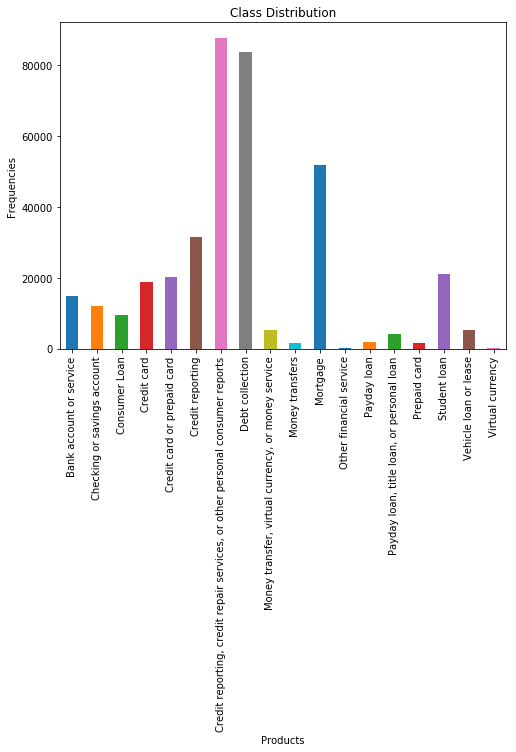

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df_complaints.groupby("Product")["Consumer complaint narrative"].count().plot.bar()
plt.xlabel("Products")
plt.ylabel("Frequencies")
plt.title("Class Distribution")
plt.show()

### Transform text into numerical features for the model

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                        encoding='latin-1', stop_words='english', ngram_range=(1,2))
features = tfidf.fit_transform(df_complaints["Consumer complaint narrative"])

In [12]:
type(features)

scipy.sparse.csr.csr_matrix

In [13]:
labels = df_complaints["category"]

In [14]:
print(features.shape)
print(labels.shape)

(371081, 708135)
(371081,)


In [64]:
# features_chi2 = chi2(features, labels == 0)
# indices = np.argsort(features_chi2[0])
# feature_names = np.array(tfidf.get_feature_names())[indices]
# unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
# bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
unigrams[30303:]

['fincen', 'signup']

### Find the top 2 features (unigrams and bigrams with the highest chi squared value

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. 00 bonus
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. vehicle
. car
  . Most correlated bigrams:
. chrysler capital
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. disputed resolve
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. report understanding


### Train some base classifiers now , using NB, LR, RF and Linear SVM

In [90]:
### Naive Bayes model to start with

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

X_train, X_test, Y_train, Y_test = train_test_split(df_complaints["Consumer complaint narrative"], 
                                                    df_complaints["Product"], random_state=41)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)


In [1]:
# using the TFIDFVectorizer is equivalent to using CountVectorizer followed by TfIdfTransformer
# print(count_vect.get_feature_names())
print(" ")
# print(X_train_counts.toarray())

### Check the results of the TFIDF Transformer

In [92]:
print(X_train.shape)
print(X_train_counts.shape)

tfidfvect = TfidfTransformer()
X_train_tfidf = tfidfvect.fit_transform(X_train_counts)

# print(X_train_tfidf)

(278310,)
(278310, 99062)


In [93]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predict a few examples

In [94]:
print(nb_clf.predict(tfidfvect.transform(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]))))


['Debt collection']


In [96]:
df_complaints[df_complaints["Consumer complaint narrative"]=="This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer complaint narrative,category
709872,Debt collection,This company refuses to provide me verificatio...,7


In [98]:
text_to_predict = "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"

print(nb_clf.predict(tfidfvect.transform(count_vect.transform([text_to_predict]))))

['Credit reporting, credit repair services, or other personal consumer reports']


In [99]:
df_complaints[df_complaints["Consumer complaint narrative"]==text_to_predict]

,Product,Consumer complaint narrative,category
675770,Credit reporting,I am disputing the inaccurate information the ...,5


### Try other models - Use Cross Validation to get the accuracies

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

models = [RandomForestClassifier(n_estimators=20, max_depth=3, random_state=11),
          LinearSVC(),
         MultinomialNB(),
         LogisticRegression(random_state=11)]

CV = 5
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV, verbose=2, njobs=-1)
    for item, accuracy in enumerate(accuracies):
        entries.append((model_name,item,accuracy ))
    cv_pd = pd.DataFrame(entries, columns=["model_name", "idx", "accuracy"])
    

[CV]  ................................................................
[CV] ................................................. , total=   8.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] ................................................. , total=   7.7s
[CV]  ................................................................
[CV] ................................................. , total=   8.1s
[CV]  ................................................................
[CV] ................................................. , total=   7.3s
[CV]  ................................................................
[CV] ................................................. , total=   8.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   40.1s finished


[CV] ................................................. , total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ................................................. , total= 1.5min
[CV]  ................................................................
[CV] ................................................. , total= 1.3min
[CV]  ................................................................
[CV] ................................................. , total= 1.3min
[CV]  ................................................................
[CV] ................................................. , total= 1.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.7min finished


[CV] ................................................. , total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ................................................. , total=   3.8s
[CV]  ................................................................
[CV] ................................................. , total=   3.8s
[CV]  ................................................................
[CV] ................................................. , total=   3.8s
[CV]  ................................................................
[CV] ................................................. , total=   3.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.6s finished


[CV]  ................................................................
[CV] ................................................. , total= 5.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.0min remaining:    0.0s


[CV] ................................................. , total= 5.1min
[CV]  ................................................................
[CV] ................................................. , total= 5.3min
[CV]  ................................................................
[CV] ................................................ , total=171.5min
[CV]  ................................................................
[CV] ................................................. , total= 6.0min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 192.8min finished


In [104]:
print(cv_pd.shape)
print(cv_pd)

(20, 3)
                model_name  idx  accuracy
0   RandomForestClassifier    0  0.290058
1   RandomForestClassifier    1  0.310384
2   RandomForestClassifier    2  0.278225
3   RandomForestClassifier    3  0.271425
4   RandomForestClassifier    4  0.266130
5                LinearSVC    0  0.697560
6                LinearSVC    1  0.727072
7                LinearSVC    2  0.741340
8                LinearSVC    3  0.734962
9                LinearSVC    4  0.688012
10           MultinomialNB    0  0.580171
11           MultinomialNB    1  0.585980
12           MultinomialNB    2  0.590646
13           MultinomialNB    3  0.604754
14           MultinomialNB    4  0.586958
15      LogisticRegression    0  0.703582
16      LogisticRegression    1  0.738821
17      LogisticRegression    2  0.752712
18      LogisticRegression    3  0.743276
19      LogisticRegression    4  0.704614


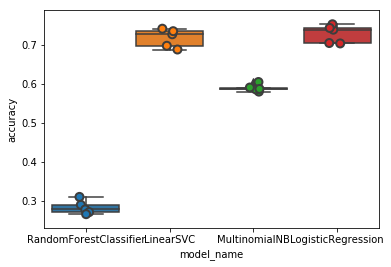

In [102]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_pd)
sns.stripplot(x='model_name', y='accuracy', data=cv_pd, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

### Select the best model and get the Confusion matrix and Evaluation results

In [105]:
# find the Average accuracy for all the models
cv_pd.groupby("model_name").accuracy.mean()

model_name
LinearSVC                 0.717789
LogisticRegression        0.728601
MultinomialNB             0.589702
RandomForestClassifier    0.283244
Name: accuracy, dtype: float64

### Now select the LR model and get the confusion matrix

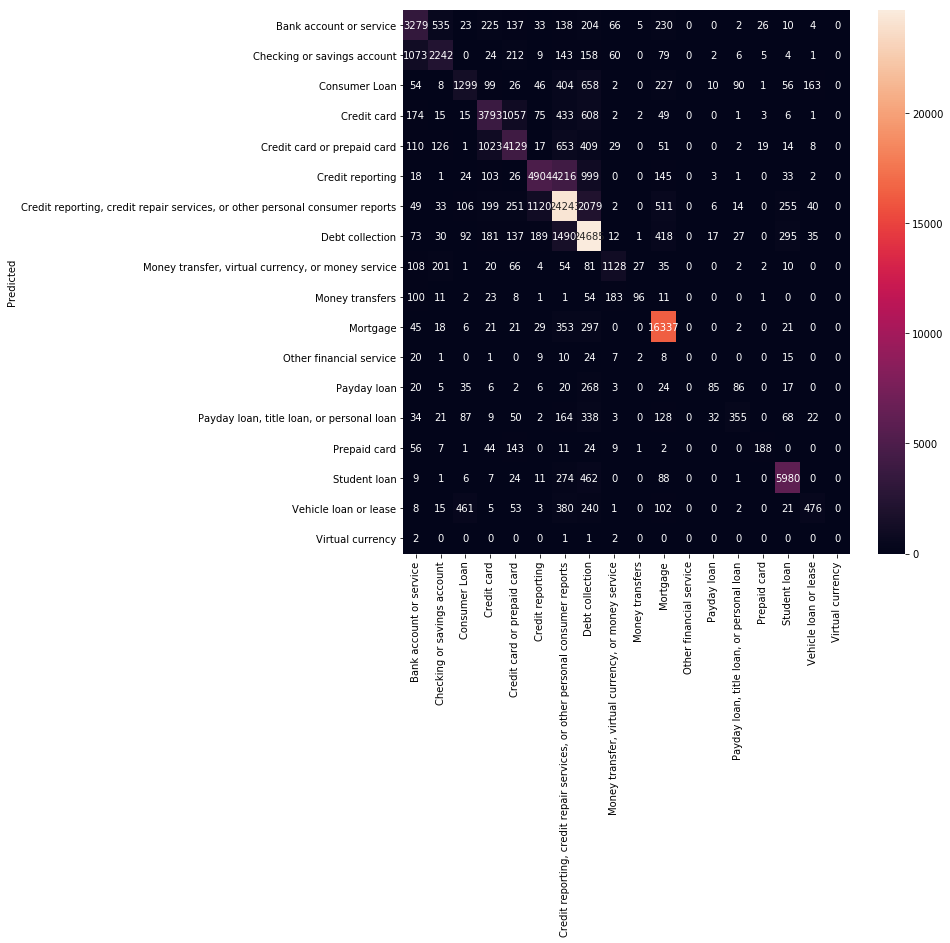

In [108]:
final_model = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.33, random_state=11)    
final_model.fit(X_train, Y_train)

y_pred = final_model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_matr = confusion_matrix(Y_test, y_pred)
fix, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matr, annot=True, fmt='d', xticklabels=category_id_df.Product.values, 
           yticklabels=category_id_df.Product.values)
plt.ylabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [106]:
# ?sns.heatmap

### Get the Evaluation Metrics for the Trained Model

In [115]:
from sklearn import metrics

print(metrics.classification_report(Y_test, y_pred, target_names=category_id_df.Product.values))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.63      0.67      0.65      4917
                                                 Checking or savings account       0.69      0.56      0.62      4018
                                                               Consumer Loan       0.60      0.41      0.49      3143
                                                                 Credit card       0.66      0.61      0.63      6234
                                                 Credit card or prepaid card       0.65      0.63      0.64      6591
                                                            Credit reporting       0.76      0.47      0.58     10475
Credit reporting, credit repair services, or other personal consumer reports       0.73      0.84      0.78     28908
                                                       

## Experimental Doc2Vec using Gensim

In [117]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
doc2vec_model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [125]:
doc2vec_model.train(documents, doc2vec_model.corpus_count, epochs=100)

In [130]:
from nltk.tokenize import word_tokenize

test_data = word_tokenize("I love chatbots".lower())
v1 = doc2vec_model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = doc2vec_model.docvecs.most_similar(1)
print(similar_doc)

V1_infer [ 0.02182247 -0.08018448  0.0599794  -0.01770012  0.0417373 ]
[(6, 0.5127213001251221), (3, 0.4198095500469208), (5, 0.33350807428359985), (7, 0.2063370645046234), (4, 0.1766483038663864), (8, -0.040153779089450836), (0, -0.20320895314216614), (2, -0.25935402512550354)]
